In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# encoding
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# escalado
from sklearn.preprocessing import StandardScaler

# modelado
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

# modificación hiperparámetros
from sklearn.model_selection import RandomizedSearchCV

# Regresión logística

## 1. Conociendo los datos

In [2]:
# Importar los datos y generar el Dataset
df = pd.read_csv("https://storage.googleapis.com/breathecode/project-files/bank-marketing-campaign-data.csv", sep = ";")

# Mostrar los primeros 5 datos 
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Obtener las dimensiones del Dataset

filas, atributos = df.shape
print(f'{filas} filas y {atributos} columnas')

41188 filas y 21 columnas


In [4]:
# Obtener información sobre tipos de datos y valores no nulos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

El Dataset posee 21 variables, ninguna de ellas posee valores nulos. Hay 11 variables de tipo numérico (5 variables de tipo integral y 5 de tipo flotante) y 11 variables de tipo categórico identificadas como objetos. 

## 2. Preparación de los datos
### Elementos duplicados

In [5]:
df.duplicated().sum()

np.int64(12)

In [6]:
# Visualizamos los datos duplicados
duplicados = df.duplicated()
df_duplicados = df[duplicados]
df_duplicados

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [7]:
# Eliminamos los duplicados
df.drop_duplicates(inplace=True)
df.shape

(41176, 21)

### Renombrar atributos

In [8]:
# Hay atributos que contienen puntos en su nombre y puede ser confuso, los cambiamos por '_'
df.rename(columns={"emp.var.rate": "emp_var_rate",
                   "cons.price.idx": "cons_price_idx",
                   "cons.conf.idx": "cons_conf_idx",
                   "nr.employed": "nr_employed"}, inplace=True)

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Selección de atributos relevantes

* Descripción del problema

El banco portugués está teniendo una disminución en sus ingresos, por lo que quieren poder **identificar a los clientes existentes que tienen una mayor probabilidad de contratar un depósito a largo plazo**. Esto permitirá que el banco centre sus esfuerzos de marketing en esos clientes y evitará perder dinero y tiempo en clientes que probablemente no se suscribirán.

In [9]:
# Eliminamos del Dataset los atributos que sabemos con seguridad que no nos van a hacer falta

df.drop(["day_of_week"], axis = 1, inplace = True)
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Valores atípicos

In [10]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [11]:
# Calcular outliers de variables numéricas
variable = "nr_employed"     #Escribir la variable a calcular

Q1 = df[variable].quantile(0.25)
Q3 = df[variable].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 3 * IQR                  # Calculamos los outliers extremos (*3) para no descartar muchos valores
limite_superior = Q3 + 3 * IQR

print(f"Q1 = {Q1}")
print(f"Q3 = {Q3}")
print(f"IQR = {IQR}")
print(f"Límite inferior = {limite_inferior}")
print(f"Límite superior = {limite_superior}")

outliers = df[(df[variable] < limite_inferior) | (df[variable] > limite_superior)]
print(f"Número de outliers: {len(outliers)}")
print(f"Porcentaje: {100 * len(outliers) / len(df):.2f}%")

Q1 = 5099.1
Q3 = 5228.1
IQR = 129.0
Límite inferior = 4712.1
Límite superior = 5615.1
Número de outliers: 0
Porcentaje: 0.00%


* "**age**": se observan outliers por encima de los 92 años, con un máximo de 98. Sin embargo, estos valores son posibles en la población, por lo que no los descartamos.

* "**duration**" presenta outliers en valores superiores a 970 segundos (más de 16 minutos de llamada), pero no los descartamos porque es posible que algunas llamadas duren más tiempo.

* "**campaign**" presenta outliers en valores por encima de 9 contactos, pero existen mas de 1000 observaciones por encima de este rango, lo cual nos dice que no son casos excepcionales, por lo que los mantenemos.

* "**pdays**" la mayoria de los registros toman el valor de 999, lo que, según la descripción del Dataset, indica que el cliente no había sido contactado previamente. No se eliminan outliers porque esta codificación tiene sentido dentro del contexto de los datos.

* "**previous**" la mayoria de los valores son 0 (sin contactos anteriores) y el máximo es 7. Como estos valores son coherentes no se eliminan outliers.

* "**emp_var_rate**", "cons_price_idx", "cons_conf_idx", "euribor3m" y "nr_employed" no tienen outliers.


## 3. Análisis Univariado
### Variables numéricas

<Axes: xlabel='nr_employed'>

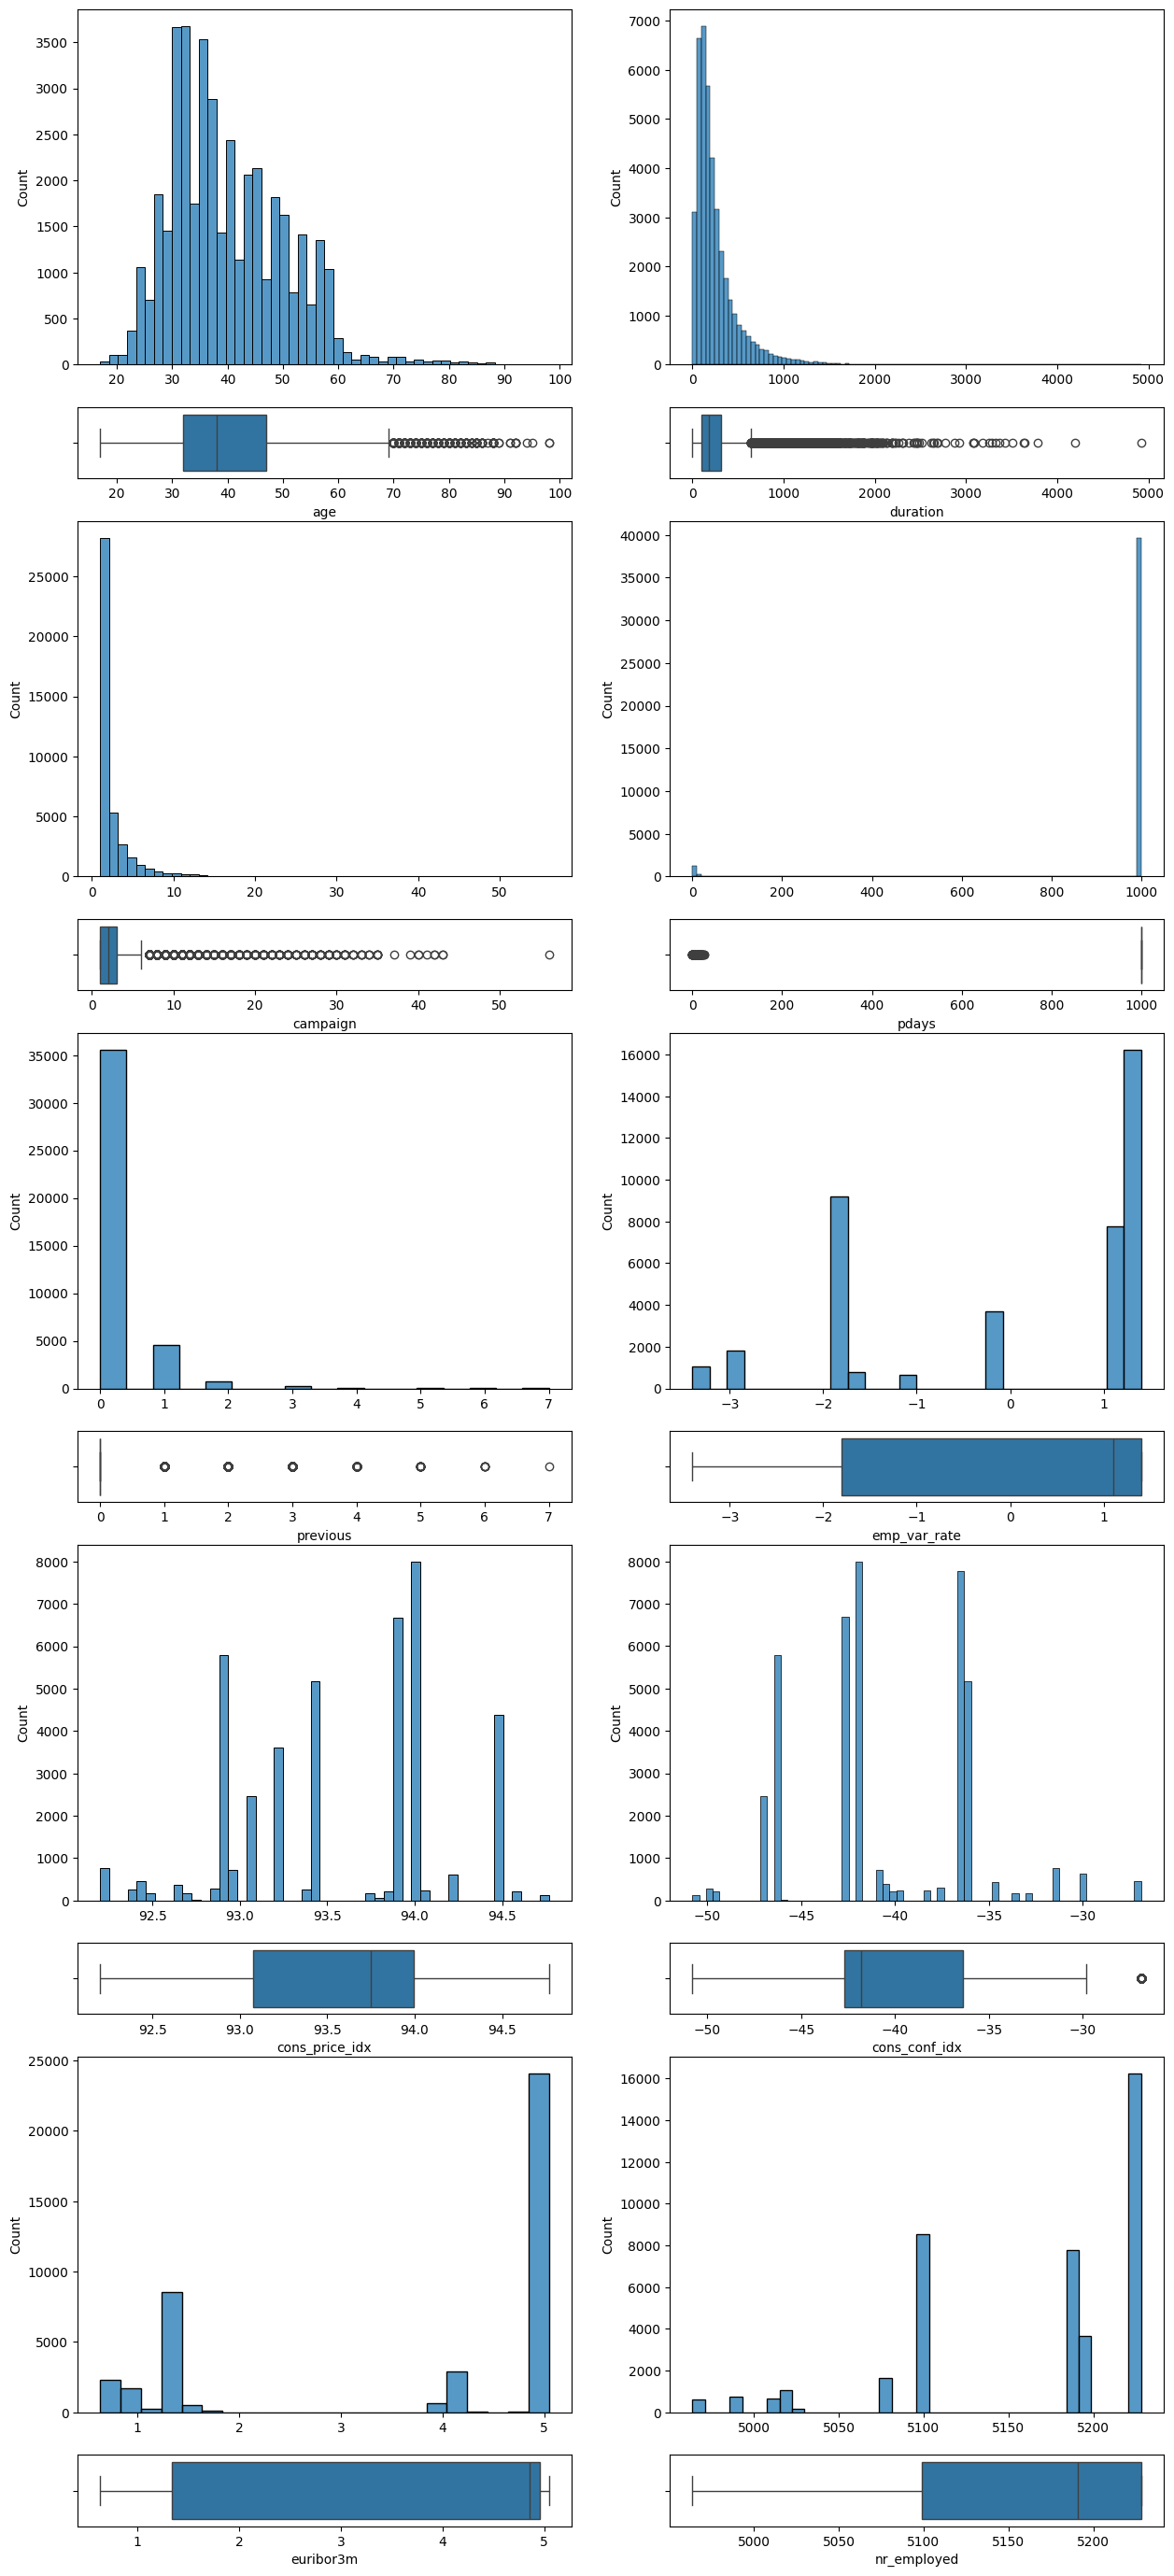

In [12]:
fig, axis = plt.subplots(10, 2, figsize = (15, 35), gridspec_kw={'height_ratios': [5, 1, 5, 1, 5, 1, 5, 1, 5, 1]})
# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df, x = "age", bins = 50).set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "age")

sns.histplot(ax = axis[0, 1], data = df, x = "duration", bins = 100).set(xlabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "duration")

sns.histplot(ax = axis[2, 0], data = df, x="campaign", bins = 50).set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = df, x="campaign")

sns.histplot(ax = axis[2, 1], data = df, x= "pdays", bins = 100).set(xlabel = None)
sns.boxplot(ax = axis[3, 1], data = df, x= "pdays")

sns.histplot(ax = axis[4, 0], data = df, x= "previous").set(xlabel = None)
sns.boxplot(ax = axis[5, 0], data = df, x= "previous")

sns.histplot(ax = axis[4, 1], data = df, x = "emp_var_rate").set(xlabel = None)
sns.boxplot(ax = axis[5, 1], data = df, x = "emp_var_rate")

sns.histplot(ax = axis[6, 0], data = df, x = "cons_price_idx").set(xlabel = None)
sns.boxplot(ax = axis[7, 0], data = df, x = "cons_price_idx")

sns.histplot(ax = axis[6, 1], data = df, x = "cons_conf_idx").set(xlabel = None)
sns.boxplot(ax = axis[7, 1], data = df, x = "cons_conf_idx")

sns.histplot(ax = axis[8, 0], data = df, x = "euribor3m").set(xlabel = None)
sns.boxplot(ax = axis[9, 0], data = df, x = "euribor3m")

sns.histplot(ax = axis[8, 1], data = df, x = "nr_employed").set(xlabel = None)
sns.boxplot(ax = axis[9, 1], data = df, x = "nr_employed")

### Variables categóricas

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   duration        41176 non-null  int64  
 10  campaign        41176 non-null  int64  
 11  pdays           41176 non-null  int64  
 12  previous        41176 non-null  int64  
 13  poutcome        41176 non-null  object 
 14  emp_var_rate    41176 non-null  float64
 15  cons_price_idx  41176 non-null  float64
 16  cons_conf_idx   41176 non-null  float64
 17  euribor3m       41176 non-null  floa

In [14]:
# Observar cuantas categorías tenemos por variable categórica

job = df["job"].nunique()
marital = df["marital"].nunique()
edu = df["education"].nunique()
default = df["default"].nunique()
house = df["housing"].nunique()
loan = df["loan"].nunique()
contact = df["contact"].nunique()
month = df["month"].nunique()
poutcome = df["poutcome"].nunique()
y = df["y"].nunique()

print(f' "job" tiene {job} categorias')
print(f' "marital" tiene {marital} categorias')
print(f' "education" tiene {edu} categorias')
print(f' "default" tiene {default} categorias')
print(f' "housing" tiene {house} categorias')
print(f' "loan" tiene {loan} categorias')
print(f' "contact" tiene {contact} categorias')
print(f' "month" tiene {month} categorias')
print(f' "poutcome" tiene {poutcome} categorias')
print(f' "y" tiene {y} categorias')

 "job" tiene 12 categorias
 "marital" tiene 4 categorias
 "education" tiene 8 categorias
 "default" tiene 3 categorias
 "housing" tiene 3 categorias
 "loan" tiene 3 categorias
 "contact" tiene 2 categorias
 "month" tiene 10 categorias
 "poutcome" tiene 3 categorias
 "y" tiene 2 categorias


<Axes: xlabel='y', ylabel='count'>

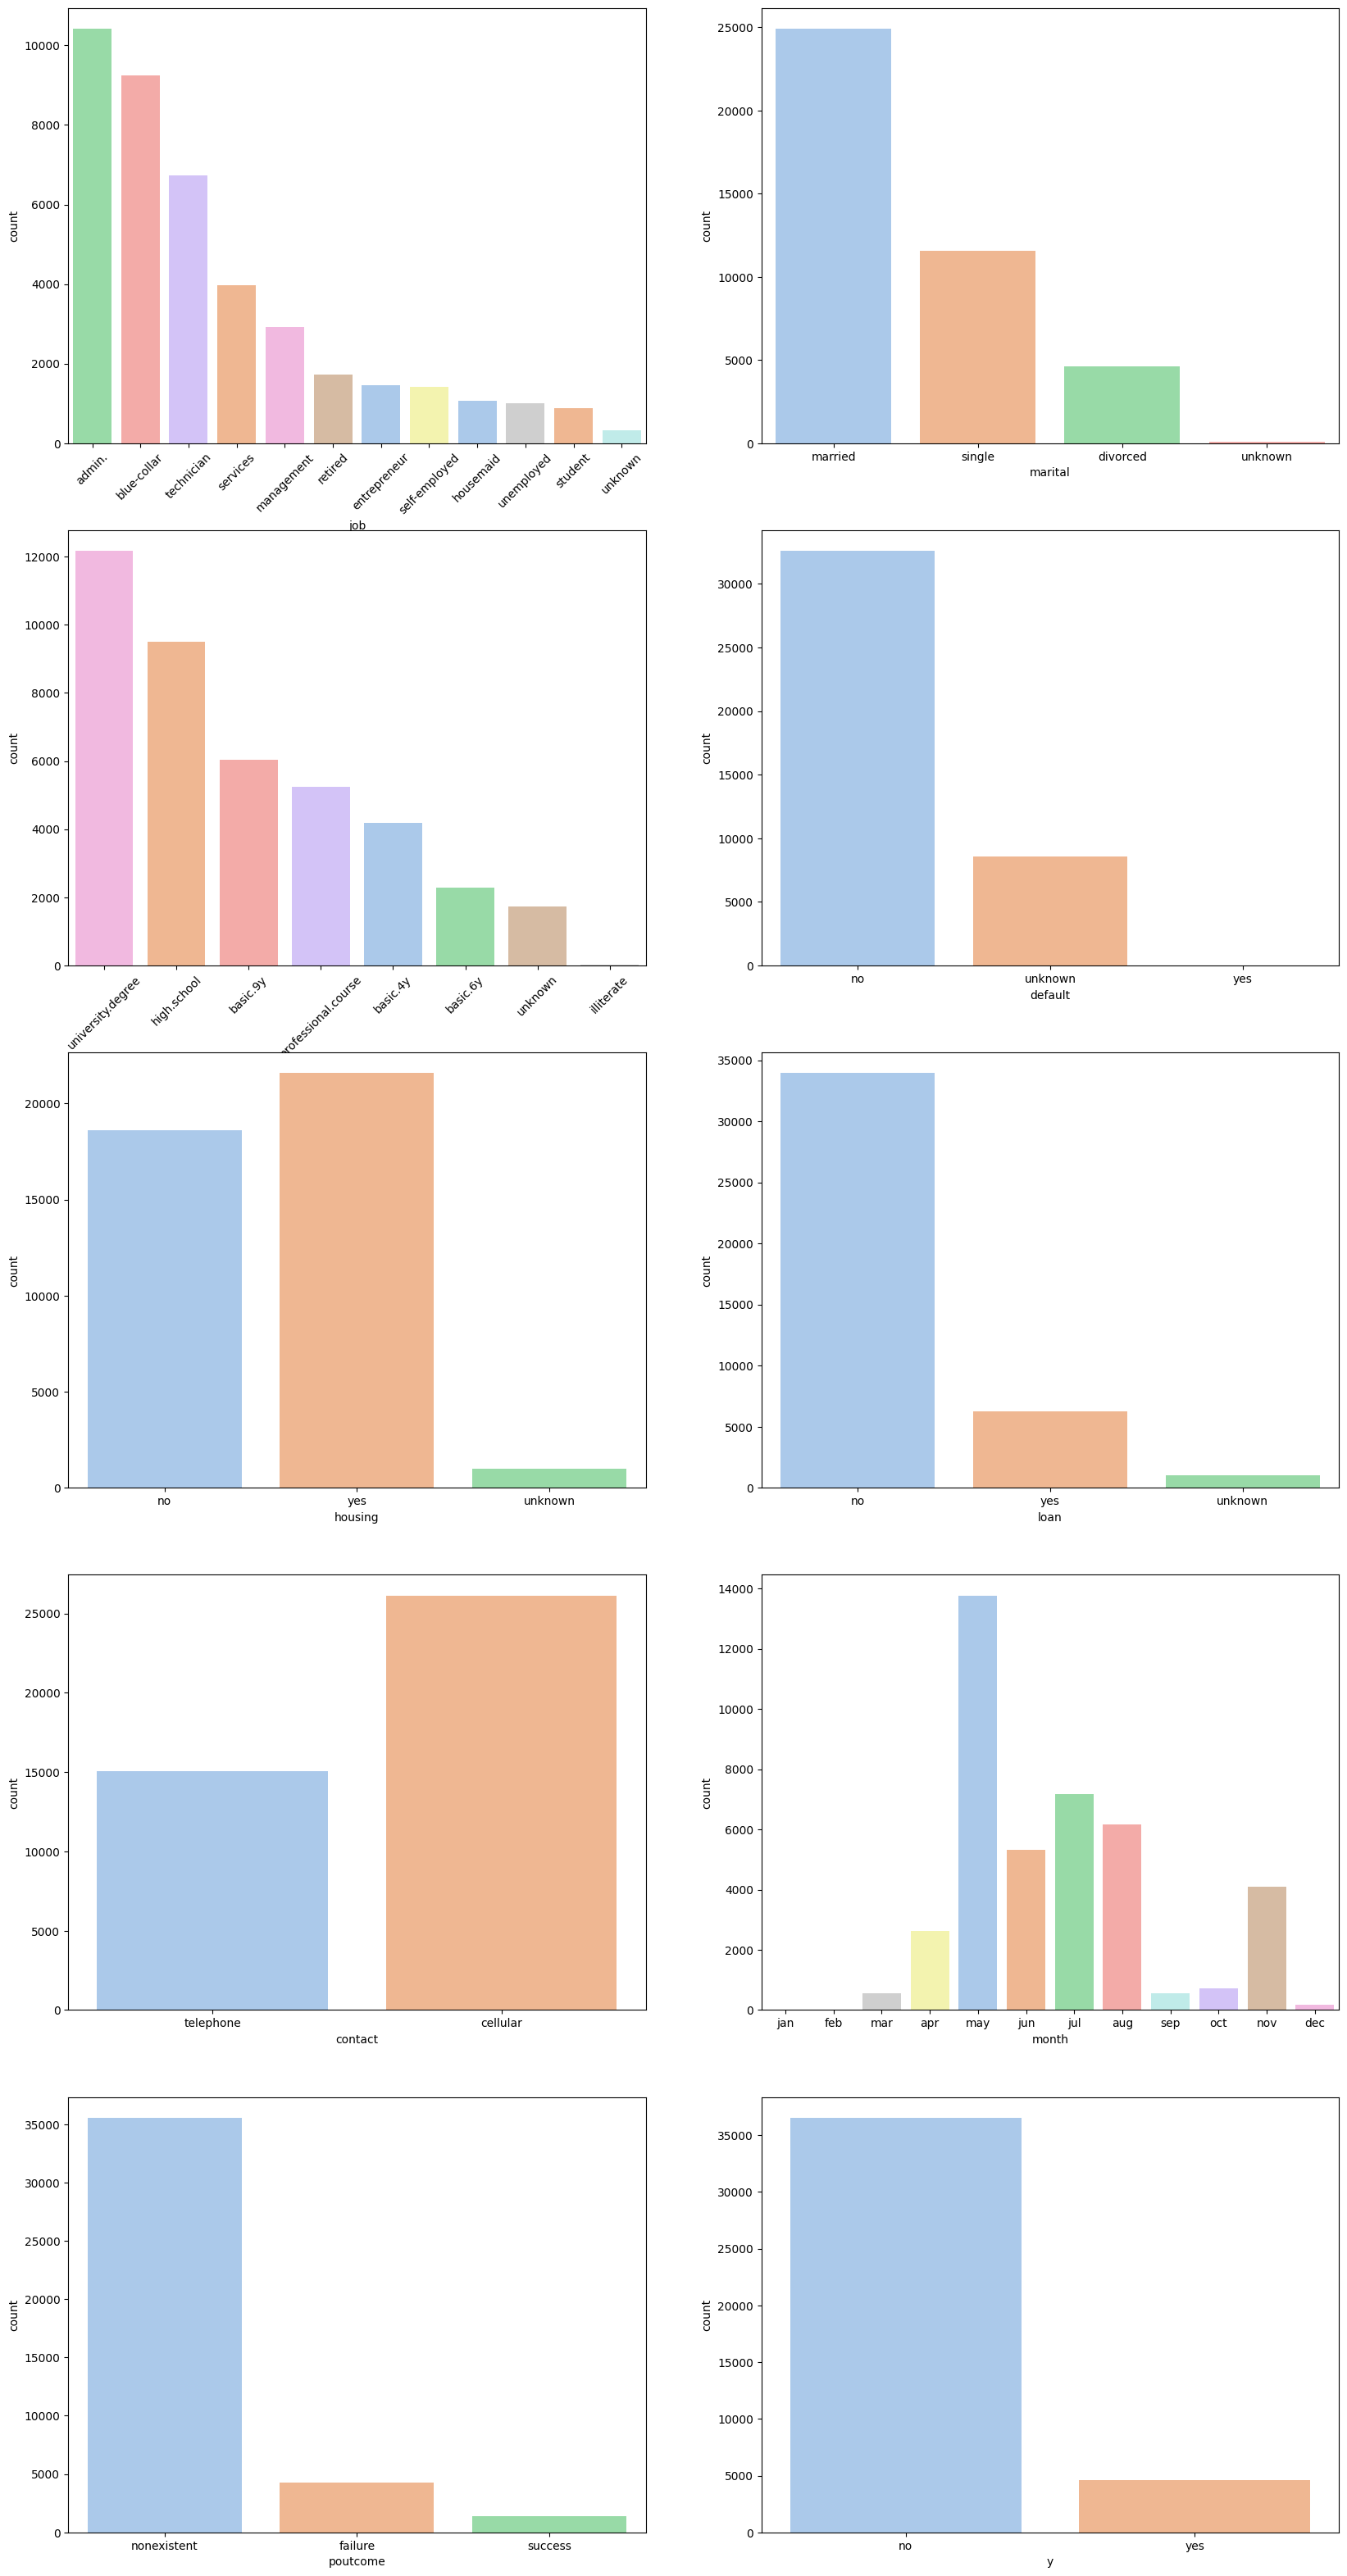

In [15]:
# Variables categóricas.
large_to_small_job = df.groupby('job').size().sort_values().index[::-1]
large_to_small_edu = df.groupby('education').size().sort_values().index[::-1]
fig, axis = plt.subplots(5, 2, figsize = (20, 40))

sns.countplot(ax = axis[0, 0], data = df, x = "job", order= large_to_small_job, palette='pastel', hue= "job", legend=False)
axis[0, 0].tick_params(axis='x', rotation=45)

sns.countplot(ax = axis[0, 1], data = df, x = "marital", palette='pastel', hue= "marital", legend=False)

sns.countplot(ax = axis[1, 0], data = df, x = "education", order= large_to_small_edu, palette='pastel', hue= "education", legend=False)
axis[1, 0].tick_params(axis='x', rotation=45)

sns.countplot(ax = axis[1, 1], data = df, x = "default", palette='pastel', hue= "default", legend=False)

sns.countplot(ax = axis[2, 0], data = df, x = "housing", palette='pastel', hue= "housing", legend=False)

sns.countplot(ax = axis[2, 1], data = df, x = "loan", palette='pastel', hue= "loan", legend=False)

sns.countplot(ax = axis[3, 0], data = df, x = "contact", palette='pastel', hue= "contact", legend=False)

sns.countplot(ax = axis[3, 1], data = df, x = "month", order = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"], palette='pastel', hue= "month", legend=False)

sns.countplot(ax = axis[4, 0], data = df, x = "poutcome", palette='pastel', hue= "poutcome", legend=False)

sns.countplot(ax = axis[4, 1], data = df, x = "y", palette='pastel', hue= "y", legend=False)

## 5. Análisis Multivariado

In [16]:

df_cat_labeled = df.copy()
# Definir el orden de las categorías
ordinal_encoder_mar = OrdinalEncoder(categories=[['unknown', 'single', 'married', 'divorced']])
ordinal_encoder_edu = OrdinalEncoder(categories=[['unknown', 'illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree']])
ordinal_encoder_noyes = OrdinalEncoder(categories=[['unknown', 'no', 'yes']])
ordinal_encoder_month = OrdinalEncoder(categories=[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']])
ordinal_encoder_pout = OrdinalEncoder(categories=[['nonexistent', 'failure', 'success']])

df_cat_labeled['marital_oe'] = ordinal_encoder_mar.fit_transform(df[['marital']])
df_cat_labeled['education_oe'] = ordinal_encoder_edu.fit_transform(df[['education']])
df_cat_labeled['default_oe'] = ordinal_encoder_noyes.fit_transform(df[['default']])
df_cat_labeled['housing_oe'] = ordinal_encoder_noyes.fit_transform(df[['housing']])
df_cat_labeled['loan_oe'] = ordinal_encoder_noyes.fit_transform(df[['loan']])
df_cat_labeled['month_oe'] = ordinal_encoder_month.fit_transform(df[['month']])
df_cat_labeled['poutcome_oe'] = ordinal_encoder_pout.fit_transform(df[['poutcome']])

df_cat_labeled.head()

,age,job,marital,education,default,housing,loan,contact,month,duration,...,euribor3m,nr_employed,y,marital_oe,education_oe,default_oe,housing_oe,loan_oe,month_oe,poutcome_oe
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,261,...,4.857,5191.0,no,2.0,2.0,1.0,1.0,1.0,4.0,0.0
1,57,services,married,high.school,unknown,no,no,telephone,may,149,...,4.857,5191.0,no,2.0,5.0,0.0,1.0,1.0,4.0,0.0
2,37,services,married,high.school,no,yes,no,telephone,may,226,...,4.857,5191.0,no,2.0,5.0,1.0,2.0,1.0,4.0,0.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,151,...,4.857,5191.0,no,2.0,3.0,1.0,1.0,1.0,4.0,0.0
4,56,services,married,high.school,no,no,yes,telephone,may,307,...,4.857,5191.0,no,2.0,5.0,1.0,1.0,2.0,4.0,0.0


In [17]:
df_cat_labeled["y_n"] = pd.factorize(df_cat_labeled["y"])[0]
df_cat_labeled.head()


,age,job,marital,education,default,housing,loan,contact,month,duration,...,nr_employed,y,marital_oe,education_oe,default_oe,housing_oe,loan_oe,month_oe,poutcome_oe,y_n
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,261,...,5191.0,no,2.0,2.0,1.0,1.0,1.0,4.0,0.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,149,...,5191.0,no,2.0,5.0,0.0,1.0,1.0,4.0,0.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,226,...,5191.0,no,2.0,5.0,1.0,2.0,1.0,4.0,0.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,151,...,5191.0,no,2.0,3.0,1.0,1.0,1.0,4.0,0.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,307,...,5191.0,no,2.0,5.0,1.0,1.0,2.0,4.0,0.0,0


In [18]:
cat_variables = ["job", "marital", "education", "contact", "default", "housing", "loan", "month", "poutcome", "y"]

df_cat_labeled.drop(cat_variables, axis=1, inplace=True)
df_cat_labeled.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,marital_oe,education_oe,default_oe,housing_oe,loan_oe,month_oe,poutcome_oe,y_n
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,2.0,2.0,1.0,1.0,1.0,4.0,0.0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,2.0,5.0,0.0,1.0,1.0,4.0,0.0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,2.0,5.0,1.0,2.0,1.0,4.0,0.0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,2.0,3.0,1.0,1.0,1.0,4.0,0.0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,2.0,5.0,1.0,1.0,2.0,4.0,0.0,0


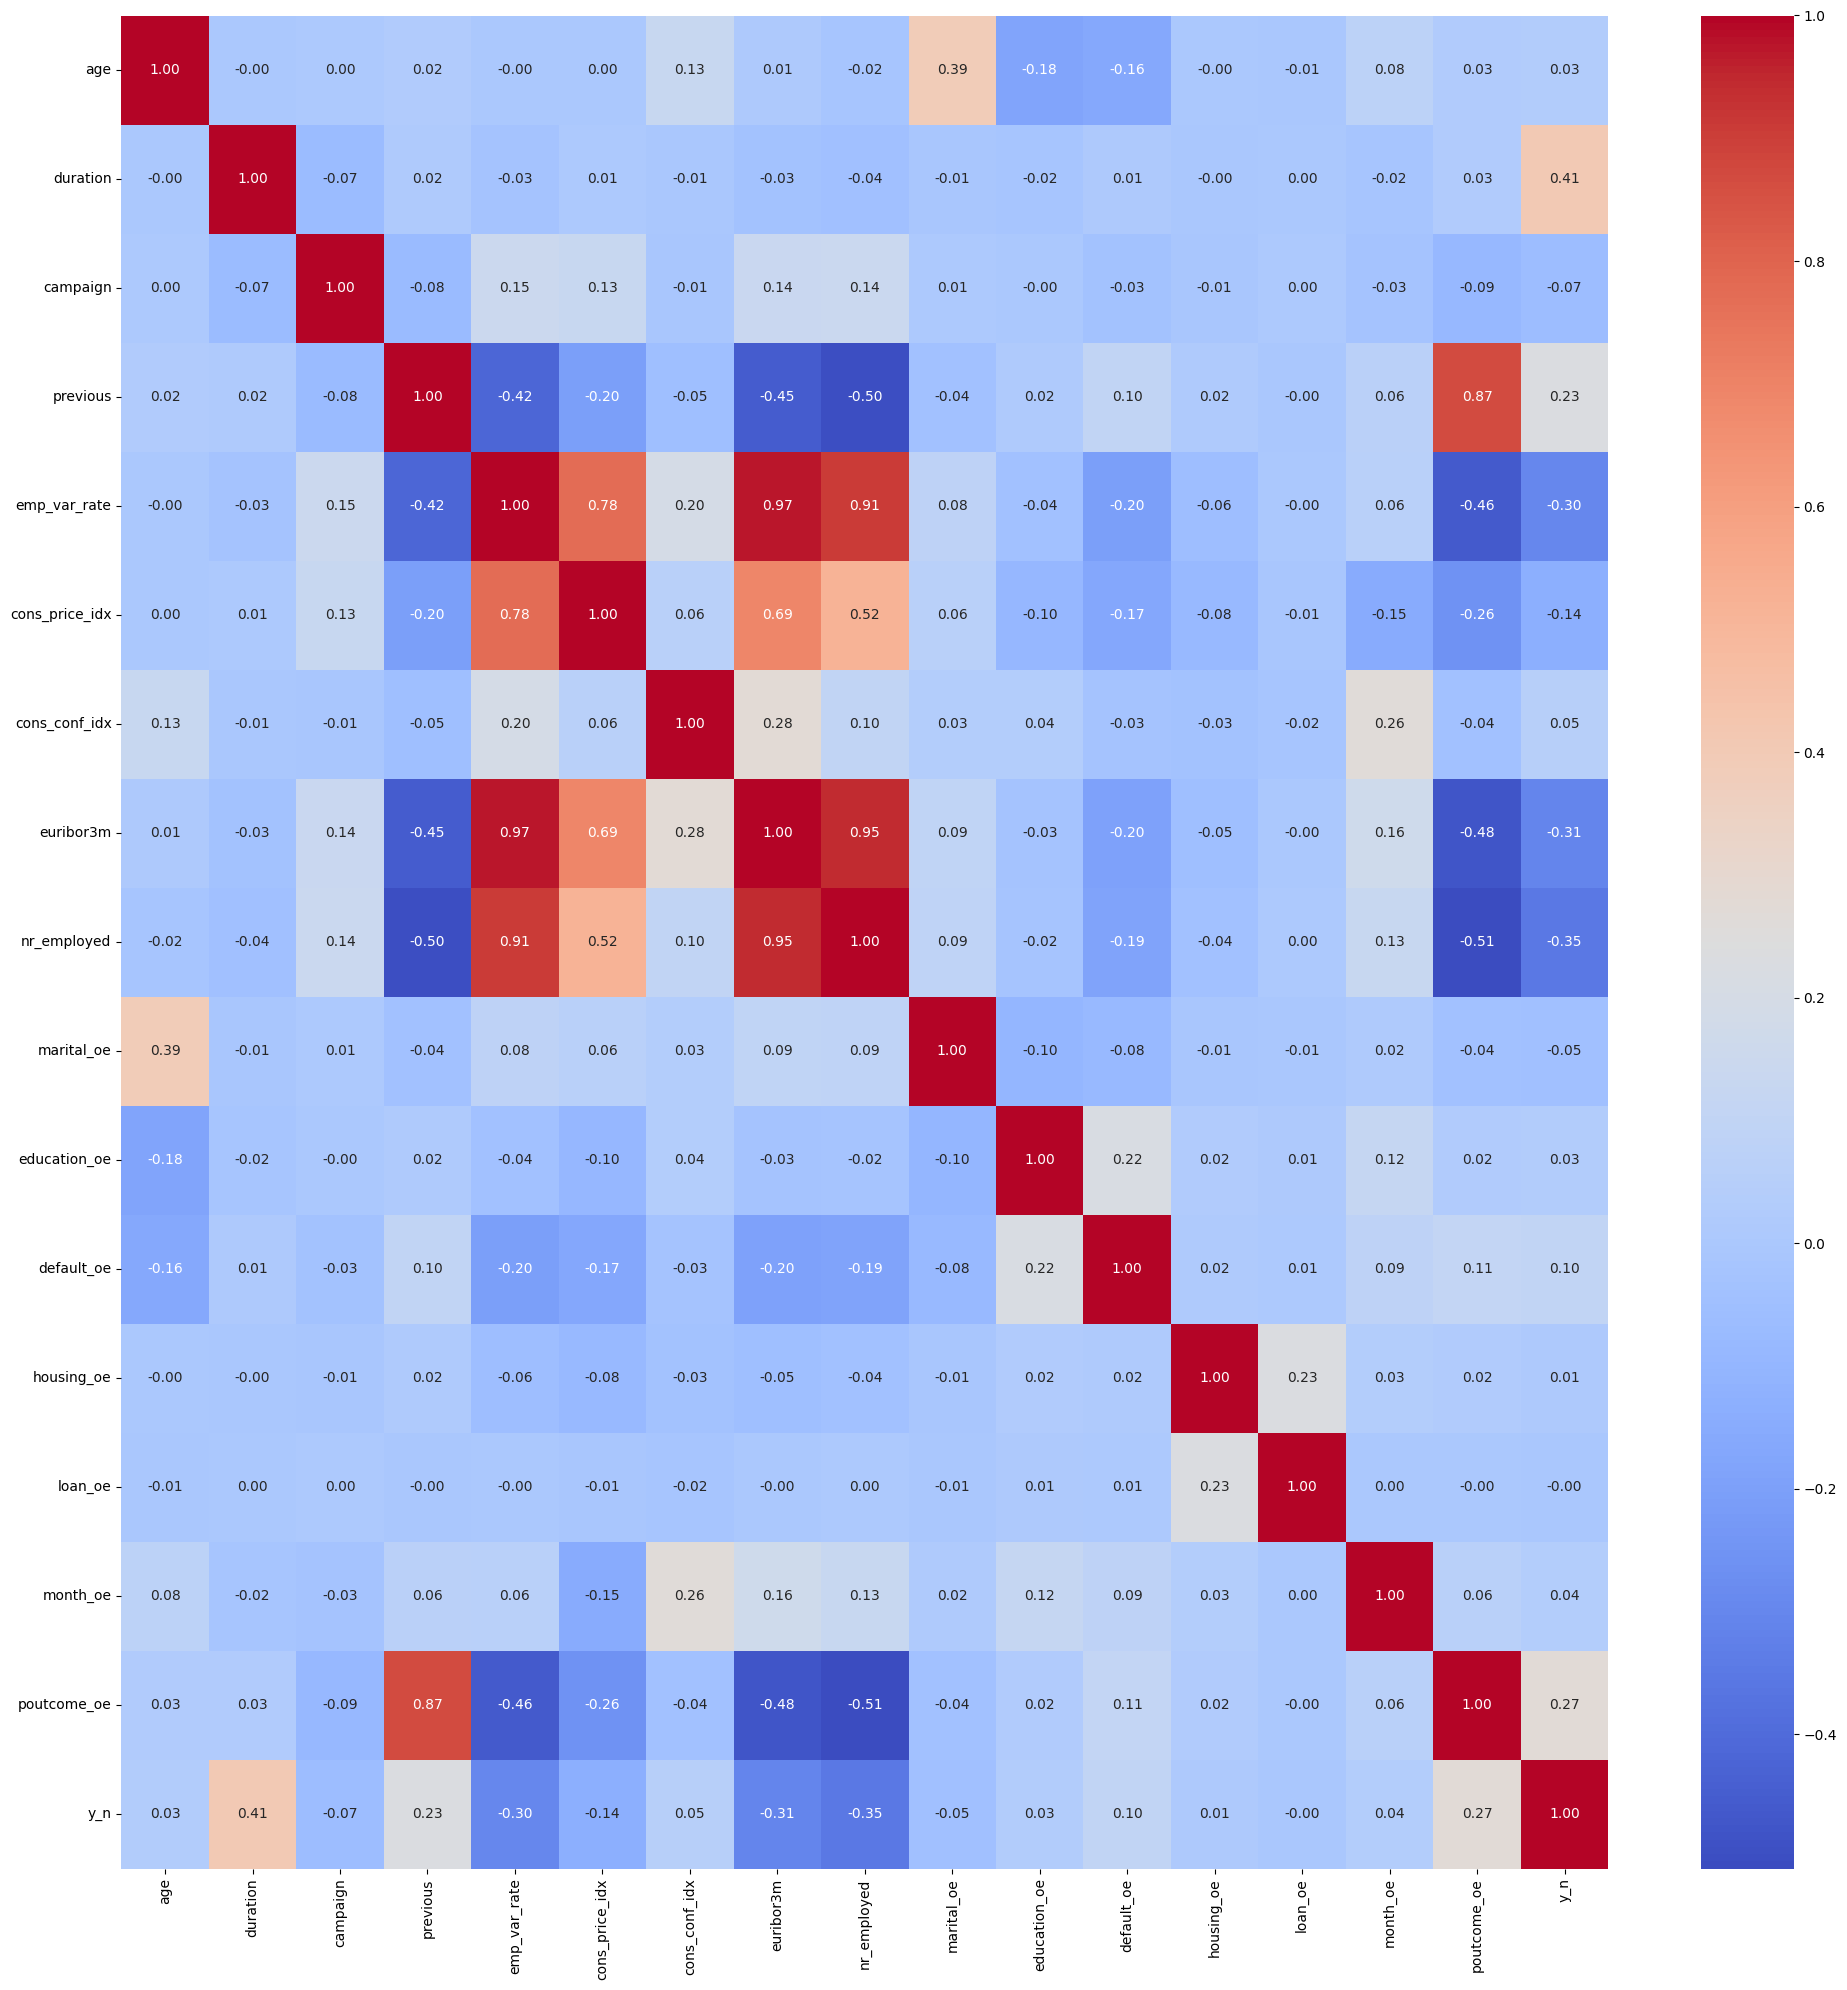

In [19]:
fig, axis = plt.subplots(figsize = (20, 20))

sns.heatmap(df_cat_labeled.drop(["pdays"], axis=1).corr(), annot = True, fmt = ".2f", cmap = "coolwarm")

plt.tight_layout()

plt.show()

La variable objetivo y se correlaciona positivamente con: poutcome, previous y duration; y negativamente con nr_employed, euribor3m, emp_var_rate.

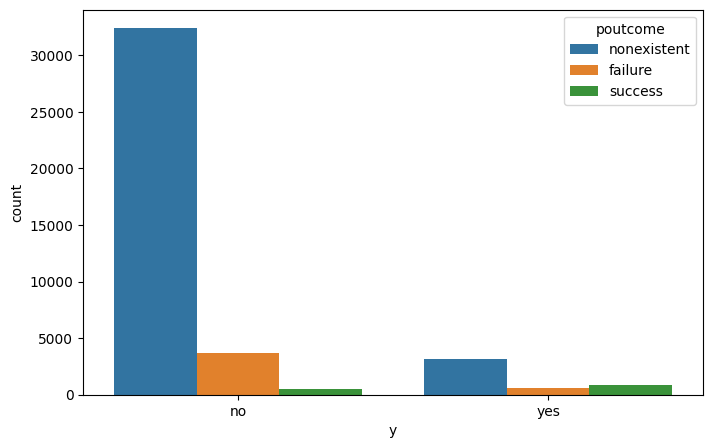

In [20]:
# Correlaciones con tendencia positiva
plt.figure(figsize=(8, 5))

sns.countplot(x='y', hue='poutcome', data=df)
plt.show()


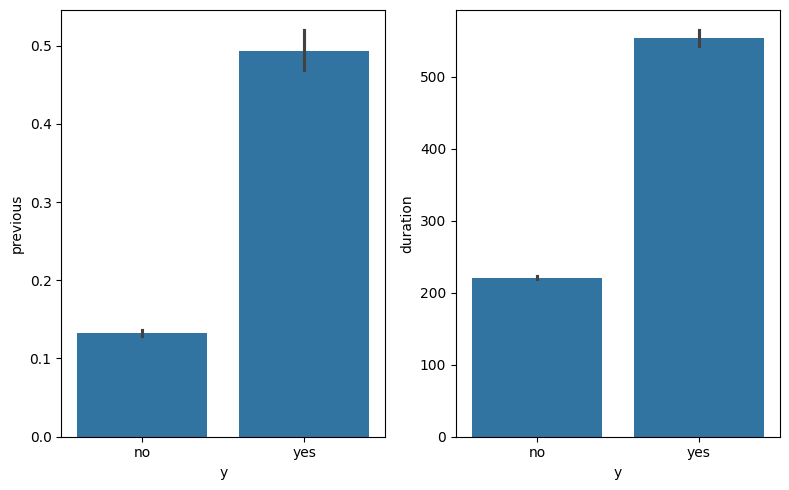

In [21]:
fig, axis = plt.subplots(1, 2, figsize = (8, 5))

sns.barplot(ax=axis[0], x ='y', y='previous', data=df)
sns.barplot(ax=axis[1], x='y', y='duration', data=df)
plt.tight_layout()
plt.show()

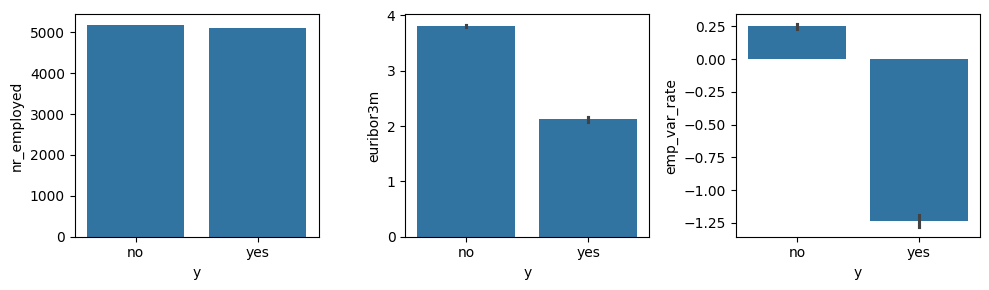

In [22]:
# nr_employed, euribor3m, emp_var_rate.

fig, axis = plt.subplots(1, 3, figsize = (10, 3))

sns.barplot(ax=axis[0], x ='y', y='nr_employed', data=df)
sns.barplot(ax=axis[1], x='y', y='euribor3m', data=df)
sns.barplot(ax=axis[2], x='y', y='emp_var_rate', data=df)
plt.tight_layout()
plt.show()

## 6. Modelo de regresión logística
### Split

In [23]:
# Dividimos el conjunto de datos en muestras de train y test
X = df.drop(["y", "contact"], axis = 1)
y = df["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,age,job,marital,education,default,housing,loan,month,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
12348,29,entrepreneur,married,basic.6y,no,yes,yes,jul,286,3,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1
8565,50,admin.,single,university.degree,no,no,no,jun,178,6,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1
21424,29,admin.,single,university.degree,no,no,no,aug,103,4,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
3316,35,admin.,single,university.degree,no,no,no,may,135,1,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
33246,40,blue-collar,single,high.school,unknown,no,no,may,418,1,999,0,nonexistent,-1.8,92.893,-46.2,1.291,5099.1


In [24]:
X_train.shape

(32940, 18)

In [25]:
X_test.shape

(8236, 18)

In [26]:
X_test

,age,job,marital,education,default,housing,loan,month,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
36264,59,retired,married,professional.course,no,yes,yes,jun,1460,1,999,0,nonexistent,-2.9,92.963,-40.8,1.266,5076.2
32672,34,blue-collar,married,basic.9y,no,no,no,may,248,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1
40872,32,technician,married,professional.course,no,yes,no,oct,275,2,999,0,nonexistent,-1.1,94.601,-49.5,0.959,4963.6
32907,53,admin.,married,high.school,no,yes,yes,may,186,2,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1
16464,24,services,single,basic.9y,no,yes,no,jul,184,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19004,53,blue-collar,married,basic.4y,no,no,no,aug,76,1,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1
34252,30,technician,married,basic.9y,no,yes,no,may,7,7,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1
13575,54,unemployed,married,university.degree,unknown,no,no,jul,106,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1
1872,46,blue-collar,married,professional.course,no,yes,no,may,106,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0


In [27]:
y_test

36264    yes
32672     no
40872    yes
32907     no
16464     no
        ... 
19004     no
34252     no
13575     no
1872      no
12339     no
Name: y, Length: 8236, dtype: object

### Escalado
#### Variables numéricas

In [28]:
num_variables = ["age", "duration", "campaign", "pdays", "previous", "emp_var_rate", "cons_price_idx", "cons_conf_idx", "euribor3m", "nr_employed"]

# instancio el escalador
scaler = StandardScaler()

# entreno el escalador con los datos de entrenamiento
scaler.fit(X_train[num_variables])

# aplico el escalador en ambos
X_train_num_scal = scaler.transform(X_train[num_variables])
X_train_num_scal = pd.DataFrame(X_train_num_scal, index = X_train.index, columns = num_variables)

X_test_num_scal = scaler.transform(X_test[num_variables])
X_test_num_scal = pd.DataFrame(X_test_num_scal, index = X_test.index, columns = num_variables)

X_train_num_scal.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
12348,-1.058427,0.112453,0.152155,0.195697,-0.348601,0.838815,0.589534,-0.470932,0.771196,0.843413
8565,0.954767,-0.305973,1.229538,0.195697,-0.348601,0.838815,1.534740,-0.276368,0.716413,0.843413
21424,-1.058427,-0.596546,0.511282,0.195697,-0.348601,0.838815,-0.229530,0.955866,0.773502,0.843413
3316,-0.483229,-0.472568,-0.566100,0.195697,-0.348601,0.647683,0.720860,0.891011,0.714107,0.330793
33246,-0.003897,0.623862,-0.566100,0.195697,-0.348601,-1.199927,-1.181648,-1.227566,-1.343979,-0.939011


### Encoding

In [29]:
## Variables categóricas ordinales ##

X_train_cat_oe = X_train.copy()
X_test_cat_oe = X_test.copy()

# Definir el orden de las categorías
ordinal_encoder_edu = OrdinalEncoder(categories=[['unknown', 'illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree']])
ordinal_encoder_noyes = OrdinalEncoder(categories=[['unknown', 'no', 'yes']])
ordinal_encoder_month = OrdinalEncoder(categories=[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']])
ordinal_encoder_pout = OrdinalEncoder(categories=[['nonexistent', 'failure', 'success']])

X_train_cat_oe['education_oe'] = ordinal_encoder_edu.fit_transform(X_train[['education']])
X_test_cat_oe['education_oe'] = ordinal_encoder_edu.transform(X_test[['education']])

X_train_cat_oe['default_oe'] = ordinal_encoder_noyes.fit_transform(X_train[['default']])
X_test_cat_oe['default_oe'] = ordinal_encoder_noyes.transform(X_test[['default']])

X_train_cat_oe['housing_oe'] = ordinal_encoder_noyes.fit_transform(X_train[['housing']])
X_test_cat_oe['housing_oe'] = ordinal_encoder_noyes.transform(X_test[['housing']])

X_train_cat_oe['loan_oe'] = ordinal_encoder_noyes.fit_transform(X_train[['loan']])
X_test_cat_oe['loan_oe'] = ordinal_encoder_noyes.transform(X_test[['loan']])

X_train_cat_oe['month_oe'] = ordinal_encoder_month.fit_transform(X_train[['month']])
X_test_cat_oe['month_oe'] = ordinal_encoder_month.transform(X_test[['month']])

X_train_cat_oe['poutcome_oe'] = ordinal_encoder_pout.fit_transform(X_train[['poutcome']])
X_test_cat_oe['poutcome_oe'] = ordinal_encoder_pout.transform(X_test[['poutcome']])


X_train_cat_oe.head()

,age,job,marital,education,default,housing,loan,month,duration,campaign,...,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,education_oe,default_oe,housing_oe,loan_oe,month_oe,poutcome_oe
12348,29,entrepreneur,married,basic.6y,no,yes,yes,jul,286,3,...,93.918,-42.7,4.959,5228.1,3.0,1.0,2.0,2.0,6.0,0.0
8565,50,admin.,single,university.degree,no,no,no,jun,178,6,...,94.465,-41.8,4.864,5228.1,7.0,1.0,1.0,1.0,5.0,0.0
21424,29,admin.,single,university.degree,no,no,no,aug,103,4,...,93.444,-36.1,4.963,5228.1,7.0,1.0,1.0,1.0,7.0,0.0
3316,35,admin.,single,university.degree,no,no,no,may,135,1,...,93.994,-36.4,4.860,5191.0,7.0,1.0,1.0,1.0,4.0,0.0
33246,40,blue-collar,single,high.school,unknown,no,no,may,418,1,...,92.893,-46.2,1.291,5099.1,5.0,0.0,1.0,1.0,4.0,0.0


In [30]:
## Variables categóricas nominales ##

cat_variables_nom = ["job", "marital"]

# instancio el encoder
onehot_encoder = OneHotEncoder(sparse_output=False)

# entreno el encoder con los datos de entrenamiento
onehot_encoder.fit(X_train[cat_variables_nom])

# aplico el encoder en amhos
X_train_cat_ohe = onehot_encoder.transform(X_train[cat_variables_nom])
X_train_cat_ohe = pd.DataFrame(X_train_cat_ohe, index = X_train.index, columns=onehot_encoder.get_feature_names_out(cat_variables_nom))

X_test_cat_ohe = onehot_encoder.transform(X_test[cat_variables_nom])
X_test_cat_ohe = pd.DataFrame(X_test_cat_ohe, index = X_test.index, columns=onehot_encoder.get_feature_names_out(cat_variables_nom))

X_train_cat_ohe.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown
12348,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8565,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21424,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3316,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
33246,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
## Variable objetivo ##

y_train_final = y_train.map({'no': 0, 'yes': 1})
y_test_final = y_test.map({'no': 0, 'yes': 1})

y_train_final

12348    0
8565     0
21424    0
3316     0
33246    0
        ..
6266     0
11285    0
38169    0
860      0
15798    0
Name: y, Length: 32940, dtype: int64

In [32]:
# Concatenar los 3 Datasets

X_train_final = pd.concat([X_train_num_scal, X_train_cat_oe[["education_oe", "default_oe", "housing_oe", "loan_oe", "month_oe", "poutcome_oe"]], X_train_cat_ohe], axis=1)
X_test_final = pd.concat([X_test_num_scal, X_test_cat_oe[["education_oe", "default_oe", "housing_oe", "loan_oe", "month_oe", "poutcome_oe"]], X_test_cat_ohe], axis=1)


X_train_final.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown
12348,-1.058427,0.112453,0.152155,0.195697,-0.348601,0.838815,0.589534,-0.470932,0.771196,0.843413,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8565,0.954767,-0.305973,1.229538,0.195697,-0.348601,0.838815,1.534740,-0.276368,0.716413,0.843413,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21424,-1.058427,-0.596546,0.511282,0.195697,-0.348601,0.838815,-0.229530,0.955866,0.773502,0.843413,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3316,-0.483229,-0.472568,-0.566100,0.195697,-0.348601,0.647683,0.720860,0.891011,0.714107,0.330793,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
33246,-0.003897,0.623862,-0.566100,0.195697,-0.348601,-1.199927,-1.181648,-1.227566,-1.343979,-0.939011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
# Por último, guardamos los datos en formato .csv en la carpeta correspondiente
X_train_final.to_csv("../data/processed/X_train.csv", index=False)
X_test_final.to_csv("../data/processed/X_test.csv", index=False)
y_train_final.to_csv("../data/processed/y_train.csv", index=False)
y_test_final.to_csv("../data/processed/y_test.csv", index=False)

### Modelado

In [34]:
# Instanciación
model = LogisticRegression()

# Entrenamiento
model.fit(X_train_final, y_train_final)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [35]:
# Predecimos el conjunto de datos de prueba

y_pred = model.predict(X_test_final)
y_pred

array([1, 0, 0, ..., 0, 0, 0], shape=(8236,))

In [36]:
# Probabilidades de cada predicción

model.predict_proba(X_test_final)

array([[0.00682349, 0.99317651],
       [0.949146  , 0.050854  ],
       [0.66395285, 0.33604715],
       ...,
       [0.99157459, 0.00842541],
       [0.98637881, 0.01362119],
       [0.98800699, 0.01199301]], shape=(8236, 2))

### Métricas de efectividad

In [37]:
# Accuracy

accuracy = accuracy_score(y_test_final, y_pred)
print(f'El modelo ha acertado la predicción en el {accuracy*100:.2f} % de las veces')

El modelo ha acertado la predicción en el 90.43 % de las veces


In [38]:
# Matriz de confusión

marketing_cm = confusion_matrix(y_test_final, y_pred)
marketing_cm

array([[7066,  199],
       [ 589,  382]])

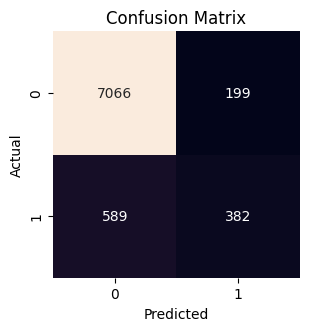

In [39]:
# Dibujaremos esta matriz para hacerla más visual
cm_df = pd.DataFrame(marketing_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

La matriz de confusión muestra que, de un total de 971 positivos reales, 382 fueron clasificados correctamente y 589 fueron clasificados erróneamente como negativos (error tipo II). 
Por otro lado, de 7265 negativos reales, 7066 fueron clasificados correctaente y 199 fueron clasificados de forma erronea como positivos(error tipo I).
En este caso convendría reducir el error de tipo II para no perder oportunidiades de contratación.

In [40]:
precision = precision_score(y_test_final, y_pred)

print(f'El modelo acierta en el {precision * 100:.2f} % de los casos que predice como positivos')



El modelo acierta en el 65.75 % de los casos que predice como positivos


In [41]:
recall = recall_score(y_test_final, y_pred) # Sensibilidad

print(f'El modelo acierta en el {recall * 100:.2f} % de los casos positivos')


El modelo acierta en el 39.34 % de los casos positivos


In [42]:
f1 = f1_score(y_test_final, y_pred)

print(f'F1 score: {f1 * 100:.2f} %')

F1 score: 49.23 %


In [43]:
roc_auc_score(y_test_final, y_pred)

0.6830086266349036

El modelo predice con bastante acierto los clientes que no van a contratar el crédito en el banco, posiblemente debido a que las clases estén desbalanceadas hacia ese lado. Sin embargo, no identifica correctamente a los clientes que sí lo van a contratar.

### Optimización hiperparámetros

In [45]:
# Definimos los parámetros que queremos ajustar
hyperparams = {
    "C": np.logspace(-4, 4, 20),
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializamos la búsqueda aleatoria
random_search = RandomizedSearchCV(model, hyperparams, n_iter = 100, scoring = "accuracy", cv = 5, random_state = 42)

random_search.fit(X_train_final, y_train_final)

print(f"Mejores hiperparámetros: {random_search.best_params_}")

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:34

Mejores hiperparámetros: {'solver': 'liblinear', 'penalty': 'l1', 'C': np.float64(29.763514416313132)}


In [46]:
model_random_search = LogisticRegression(penalty = "l1", C = 29.763514416313132, solver = "liblinear")
model_random_search.fit(X_train_final, y_train_final)
y_pred = model_random_search.predict(X_test_final)

random_search_accuracy = accuracy_score(y_test_final, y_pred)
random_search_accuracy

0.9043224866440019

In [47]:
random_search_precision = precision_score(y_test_final, y_pred)
random_search_precision

0.657487091222031

In [48]:
random_search_recall = recall_score(y_test_final, y_pred)
random_search_recall

0.39340885684860966

Como vemos, arroja las mismas métricas que la estrategia anterior. Esto quiere decir que con los medios e hiperparámetros que hemos intentado optimizar nos encontramos en un **máximo local**, y tendríamos que cambiar la estrategia de optimización.